In [1]:
import os
initial_dir = os.getcwd()
print(initial_dir)

/home/kalmar/Mathematics/Research/MPI Tuebingen/TDA-Cause-Effect-Pairs


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
import sys
import time

sys.path.append("/home/kalmar/Mathematics/Research/MPI Tuebingen/Dionysus-python3/build/bindings/python")

%reload_ext autoreload
%autoreload 2

import dionysus

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import TDA
tsp = __import__("topology-summary-plotter")
out_i = __import__("identify-outliers")
sampler = __import__("points-sampler")
os.chdir(initial_dir)

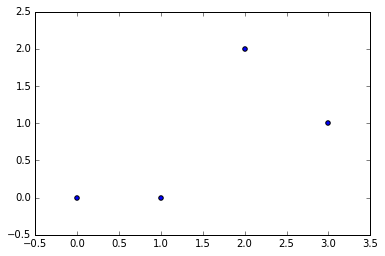

[[ 0.          3.16227766  1.          2.82842712]
 [ 3.16227766  0.          2.23606798  1.41421356]
 [ 1.          2.23606798  0.          2.23606798]
 [ 2.82842712  1.41421356  2.23606798  0.        ]]


In [3]:
from scipy.spatial.distance import cdist
pts = np.array([[0,0],[3,1],[1,0],[2,2]], dtype=np.float)
plt.scatter(pts[:,0], pts[:,1])
plt.show()
distances = cdist(pts, pts)
print(distances)

In [4]:
pattern = re.compile('pair00..\.txt')
files = sorted([x for x in os.listdir('./pairs/') if pattern.match(x)])
file_names = []
dir_names = []
for f in files:
    with open("./pairs/" + f) as points:
        x = points.readline()
        if len(x.split()) > 2:
            file_names.append(f)
            dir_names.append(f[:-4])
            
for i, f in enumerate(file_names):
    x = np.loadtxt('./pairs/'+f)
    print(i, f, x.shape)
    
i = 0
large_points = np.loadtxt('./test/'+dir_names[i]+"/std_points")
print("Loading", './test/'+dir_names[i]+"/std_points", "of shape", large_points.shape)


0 pair0052.txt (10226, 8)
1 pair0053.txt (989, 4)
2 pair0054.txt (392, 5)
3 pair0055.txt (72, 32)
4 pair0071.txt (120, 8)
5 pair0081.txt (365, 3)
6 pair0082.txt (365, 3)
7 pair0083.txt (365, 3)
Loading ./test/pair0052/std_points of shape (3000, 8)


In [177]:
points = np.loadtxt('./test/pair0001/std_points')

In [178]:
TDA.GeometricComplex(points)

INFO:root:Creating GeometricComplex on 349 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1
INFO:root:Created alpha full complex of size 1361
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.5/logging/__init__.py", line 980, in emit
    msg = self.format(record)
  File "/usr/lib/python3.5/logging/__init__.py", line 830, in format
    return fmt.format(record)
  File "/usr/lib/python3.5/logging/__init__.py", line 567, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.5/logging/__init__.py", line 330, in getMessage
    msg = msg % self.args
TypeError: a float is required
Call stack:
  File "/usr/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.5/site-pac

TypeError: __init__() missing 2 required positional arguments: 'axis' and 'inverse'

In [176]:
%lprun -f TDA.GeometricComplex.sweep_function cmplx = TDA.GeometricComplex(large_points[:500],full_initialisation=False)

INFO:root:Creating GeometricComplex on 500 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1
INFO:root:Using Rips-complex with radius 2.828427. This may be slow for dense sets!
INFO:root:Created rips full complex of size 58689
INFO:root:The threshold 2.109278 limits the complex size to 44690
INFO:root:Created the annotated complex


In [110]:
cmplx.minima

[-2.2455013589890909,
 -2.2573019872605093,
 -2.2431361516593689,
 -2.2391408028371669,
 -2.245366421333447,
 -2.229416890281148,
 -2.211061125569123,
 -2.1918904978913192]

In [121]:
A = cmplx.filtered_complex(0)
print(A[0].data[0]+cmplx.minima)

[-4.67970549 -4.70211636 -4.65781118 -4.62503451 -4.61992718 -4.63206339
 -4.61957836 -4.6118303 ]


In [173]:
simplex = A[2]
vertices = simplex.vertices
simplex_real_coordinates = np.empty((2,large_points.shape[1]))
simplex_real_coordinates[0] = large_points[next(vertices)]
simplex_real_coordinates[1] = large_points[next(vertices)]
print(simplex_real_coordinates)

[[-2.26000607 -2.2681755  -2.24956143 -2.24088951 -2.24364259 -2.23011299
  -2.21332256 -2.19705561]
 [-2.33985275 -2.35105818 -2.32890559 -2.31251726 -2.30996359 -2.3160317
  -2.30978918 -2.30591515]]


In [174]:
simplex = A[2]
vertices = simplex.vertices
simplex_real_coordinates2 = [large_points[next(vertices)],
                                        large_points[next(vertices)]]
print(simplex_real_coordinates2)

[array([-2.26000607, -2.2681755 , -2.24956143, -2.24088951, -2.24364259,
       -2.23011299, -2.21332256, -2.19705561]), array([-2.33985275, -2.35105818, -2.32890559, -2.31251726, -2.30996359,
       -2.3160317 , -2.30978918, -2.30591515])]


In [113]:
for i in range (20):
    print(A[i], A[i].data[0][0])

<26> 0.0
<86> 0.095194652697
<26, 86> 0.095194652697
<90> 0.117846392345
<86, 90> 0.117846392345
<26, 90> 0.117846392345
<92> 0.299060309527
<86, 92> 0.299060309527
<90, 92> 0.299060309527
<26, 92> 0.299060309527
<27> 0.643710829231
<27, 92> 0.643710829231
<27, 86> 0.643710829231
<27, 90> 0.643710829231
<26, 27> 0.643710829231
<44> 0.693888733514
<27, 44> 0.693888733514
<44, 92> 0.693888733514
<44, 86> 0.693888733514
<44, 90> 0.693888733514


In [115]:
z = A[2]
print(z)
m = cmplx.minima[0]
print("minimum:", m)
for i in z.vertices:
    print(i)
    print(large_points[i][0])
    print(large_points[i][0]-m)

<26, 86>
minimum: -2.24550135899
26
-2.24550135899
0.0
86
-2.15030670629
0.095194652697


In [148]:
size = 100000
a = np.array([np.random.rand(6) for i in range(size)])
b = np.array([np.random.rand(6) for i in range(size)])
c = np.array([a,b])

In [158]:
%timeit z = np.amax(c,axis=0)

100 loops, best of 3: 9.93 ms per loop


In [161]:
%timeit np.maximum(c[0], c[1])

100 loops, best of 3: 8.89 ms per loop


In [21]:
%%timeit 
cmplx.full_complex = cmplx.create_full_complex(radius=2)
cmplx.compute_the_last_death()

INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 42769
INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 42769
INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 42769
INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 42769


1 loops, best of 3: 1.1 s per loop


In [24]:
%timeit cmplx.compute_the_last_death2(2)

INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 42769
INFO:root:Using Rips-complex with radius 4.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 82434
INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 42769
INFO:root:Using Rips-complex with radius 4.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 82434
INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 42769
INFO:root:Using Rips-complex with radius 4.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 82434
INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 42769
INFO:root:Using Rips-complex with radius 4.000000. This may be

1 loops, best of 3: 3.51 s per loop


In [ ]:
begin = time.clock()
simplex_list = []
for x in cmplx.full_complex:
    v = x.vertices
    if x.dimension() == 0:
        simplex_list.append([next(v)])
    elif x.dimension() == 1:
        simplex_list.append([next(v), next(v)])
end = time.clock()
print(end-begin)

In [ ]:
begin = time.clock()
i=4
for x in simplex_list:
    if len(x) == 1:
        z = large_points[x[0]][i]
    elif len(x) == 2:
        z = max(large_points[x[0]][i], large_points[x[1]][i])
    else: 
        pass
end = time.clock()
print(end - begin)

In [ ]:
z = dionysus.Simplex([1], (23,34,234,56,234))
print(z, z.data)

In [ ]:
begin = time.clock()
large_list = large_points.tolist()
i=4
for x in simplex_list:
    if len(x) == 1:
        z = large_list[x[0]][i]
    elif len(x) == 2:
        z = max(large_list[x[0]][i], large_list[x[1]][i])
    else: 
        pass
end = time.clock()
print(end-begin)

In [ ]:
runs = 5
timings = []
for j in range(100, 1001, 100):
    time_to_build = 0
    time_to_sort = 0
    for i in range(runs):
        begin = time.clock()
        X = exact_rips_graph2(large_points[:j],3)
        end = time.clock()
        time_to_build += end-begin
        X.sort(dionysus.data_dim_cmp)
        end2 = time.clock()
        time_to_sort += end2-end
    
    timings.append([j,len(X), time_to_build/runs, time_to_sort/runs])
    print(timings[-1],flush=True)

In [ ]:
runs = 5
timings3 = []
for j in range(100, 1001, 100):
    time_to_build = 0
    time_to_sort = 0
    time_for_filtration = 0
    for i in range(runs):
        begin = time.clock()
        X = exact_rips_graph3(large_points[:j],3)
        end = time.clock()
        time_to_build += end-begin
        X.sort(key = lambda x: x.data)
        end2 = time.clock()
        time_to_sort += end2-end
        Z = dionysus.Filtration(X)
        end3 = time.clock()
        time_for_filtration += end3-end2
        
    timings3.append([j,len(X), time_to_build/runs, time_to_sort/runs, time_for_filtration/runs])
    print(timings3[-1],flush=True)

In [ ]:
t1 = np.array(timings)
t3 = np.array(timings3)
plt.figure(figsize=(10,10))
plt.plot(t3[:,0],t3[:,2]+t3[:,4], label="list-building")
plt.plot(t1[:,0],t1[:,2], label="dion-building")
plt.plot(t3[:,0],t3[:,3], label="list-sorting")
plt.plot(t1[:,0],t1[:,3], label="dion-sorting")
plt.plot(t3[:,0],t3[:,2]+t3[:,3]+t3[:,4], label="list-total")
plt.plot(t1[:,0],t1[:,2]+t1[:,3], label="dion-total")

plt.legend(loc=0)
plt.show()

In [ ]:
size = 10000000
limit = 1000
indices = np.random.randint(0,size,size)

large_points = np.random.randint(0,limit,size)
large_list = large_points.tolist()
large_points[:10]

In [ ]:
%%timeit
for i in indices:
    large_points[i]

In [ ]:
%%timeit
for i in indices:
    large_list[i]

In [ ]:
z = dionysus.Simplex([1,2,3], [12,23])

In [ ]:
z.data

In [ ]:
for i in range(12000,12050):
    print(cmplx.full_complex[i])

In [7]:
simplex = cmplx.full_complex[12000]
simplex

NameError: name 'cmplx' is not defined

In [ ]:
x = simplex.vertices
if simplex.dimension() == 0:
    simplex_real_coordinates = large_points[next(x)]
elif simplex.dimension() == 1:
    a = next(x)
    b = next(x)
    print(a,b)
    simplex_real_coordinates = [large_points[a],large_points[b]]
else:
    logging.warning("There shouldn't be any simplices of dim >1?!")
    vert = [v for v in x]
    simplex_real_coordinates = large_points[vert]
simplex_real_coordinates

In [ ]:
np.amin(simplex_real_coordinates,axis=0)

In [ ]:
large_points[1]

In [ ]:
large_points[821]